In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### The curse of dimensionality

As a data scientist, you'd rather have a dataset with a lot of features compared to one with just a few. There is however one downside to high-dimensional datasets that is, models tend to overfit badly on high-dimensional data. The solution is of course to reduce dimensionality. 

If we train a dataset with very few features with high observations or samples, that model should be able to train on this data without overfitting. But low features tend to give low accuracy scores. If we want to improve the accuracy of our model, we'll have to add features to the dataset.

However, with each feature that we add, we should also increase the number of observations of houses in our dataset. If we don't, we'll end up with a lot of unique combinations of features that models can easily memorize and thus overfit to. In fact, to avoid overfitting the number of observations should increase exponentially with the number of features. Since this becomes really problematic for high dimensional datasets this phenomenon is known as the curse of dimensionality. The solution to this is of course to apply dimensionality reduction.

#### Example: Ansur Dataset

We'll use the ANSUR dataset which has 6068 rows and 94 numeric columns as an example. 

In [2]:
df = pd.read_csv("Ansur.csv")
df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [3]:
df.describe(exclude = "number")

,Branch,Component,Gender,BMI_class,Height_class
count,6068,6068,6068,6068,6068
unique,3,3,2,3,3
top,Combat Service Support,Regular Army,Male,Overweight,Normal
freq,3174,3140,4082,4049,3386


In [4]:
non_numeric = ['Branch','Component','BMI_class','Height_class']

In [5]:
ansur_df = df.drop(non_numeric, axis = 1)

In [6]:
ansur_df.head()

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,Male,266,1467,337,222,1347,253,202,401,369,...,329,933,240,440,1054,175,853,81.5,1.776,25.838761
1,Male,233,1395,326,220,1293,245,193,394,338,...,316,870,225,371,1054,167,815,72.6,1.702,25.062103
2,Male,287,1430,341,230,1327,256,196,427,408,...,329,964,255,411,1041,180,831,92.9,1.735,30.861480
3,Male,234,1347,310,230,1239,262,199,401,359,...,315,857,205,399,968,176,793,79.4,1.655,28.988417
4,Male,250,1585,372,247,1478,267,224,435,356,...,303,868,214,379,1245,188,954,94.6,1.914,25.823034


#### Training ang Testing:

Now we'll create a classifier model of this dataset without any reduction of features

In [7]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

In [8]:
# Remove the Gender column to create the training data
X = ansur_df.drop("Gender", axis = 1)


In [9]:
# Select the Gender column as the feature to be predicted (y)
y = ansur_df["Gender"]

In [10]:
# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 94 Features.


In [12]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
# Create an instance of the Support Vector Classification class
svc = SVC()

In [14]:
# Fit the model to the training data
svc.fit(X_train,y_train)

SVC()

In [15]:
# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

99.0% accuracy on test set vs. 99.0% on training set


We can see that it gave an excellent accuracy without reduction of the dimensions. But it won't be the case always

Now, let's see how we can maintain this accuracy by reducing the dimensions 

In [16]:
X.shape

(6068, 94)

### Feature Selection by reducung low variance features

One problem with variance is that, variance values aren't always easy to interpret or compare between features. We can illustrate this by looking at our ANSUR dataset. In the boxplot you can see that these different measurements have different medians, the green horizontal lines in each blue rectangle, and variances, the height of the blue rectangles and the length of the vertical lines coming from them. For this dataset higher values tend to have higher variances and we should therefore normalize the variance before using it for feature selection.

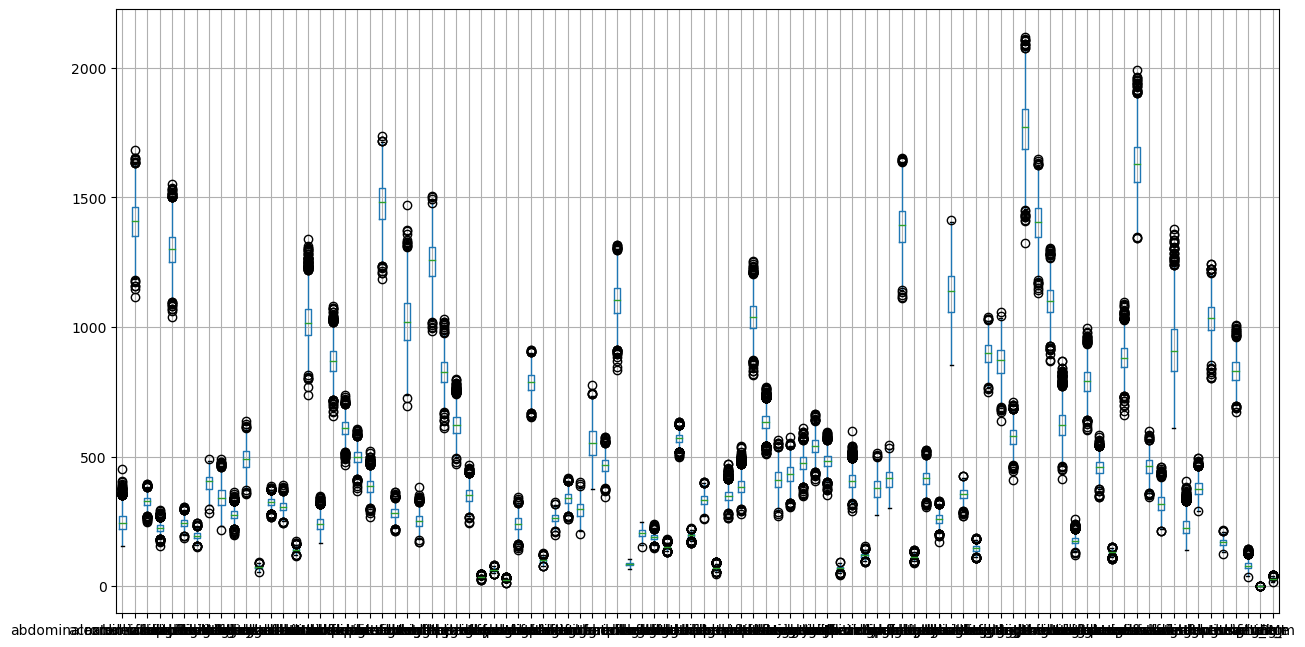

In [17]:
# Create the boxplot
plt.figure(figsize= (15,8), dpi = 100)
X.boxplot()

plt.show()

#### Normalizing the variance

low variance features are so similar between different observations that they may contain little information you can use in an analysis. To remove them, we can Normalize the variance by dividing each column by its mean value. After normalization, the variance in the dataset will be lower. 

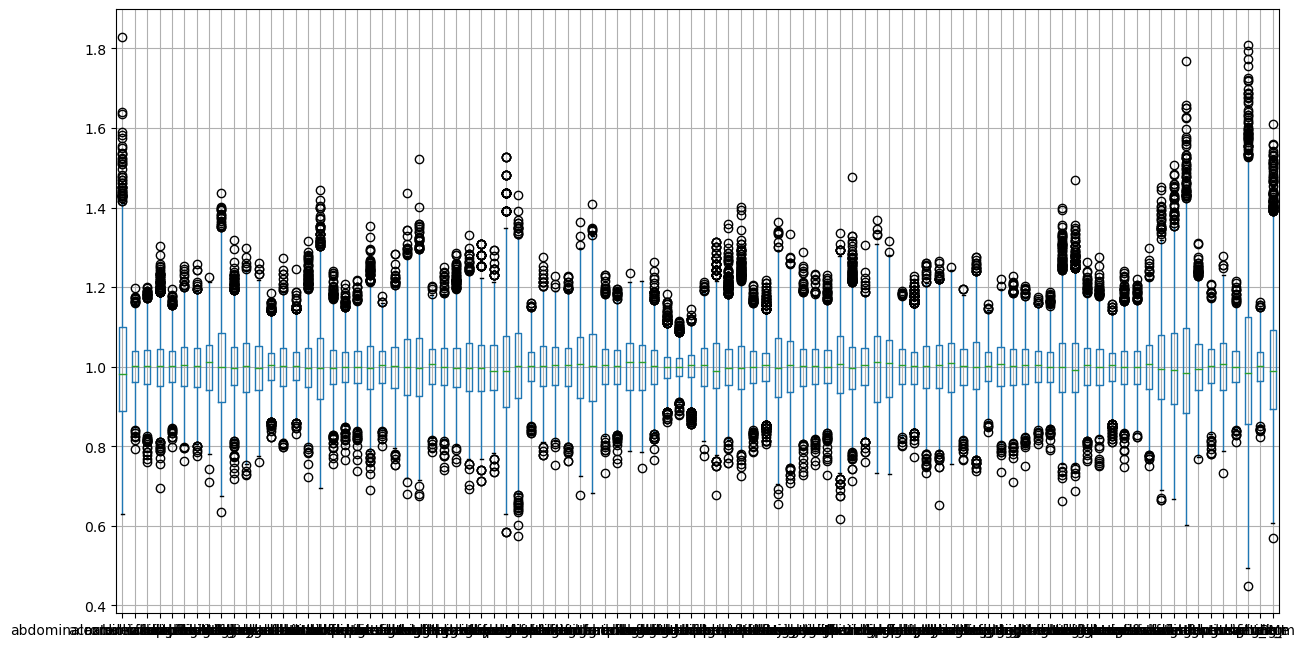

In [18]:
# Normalize the data
plt.figure(figsize= (15,8), dpi = 100)
normalized_df = X / X.mean()
normalized_df.boxplot()

plt.show()

In [19]:
# Print the variances of the normalized data
print(normalized_df.var())

abdominalextensiondepthsitting    0.023026
acromialheight                    0.003164
acromionradialelength             0.004006
anklecircumference                0.005095
axillaheight                      0.003071
                                    ...   
wristcircumference                0.006031
wristheight                       0.003295
weight_kg                         0.038563
stature_m                         0.002757
BMI                               0.022027
Length: 94, dtype: float64


Text(0, 0.5, 'Variance')

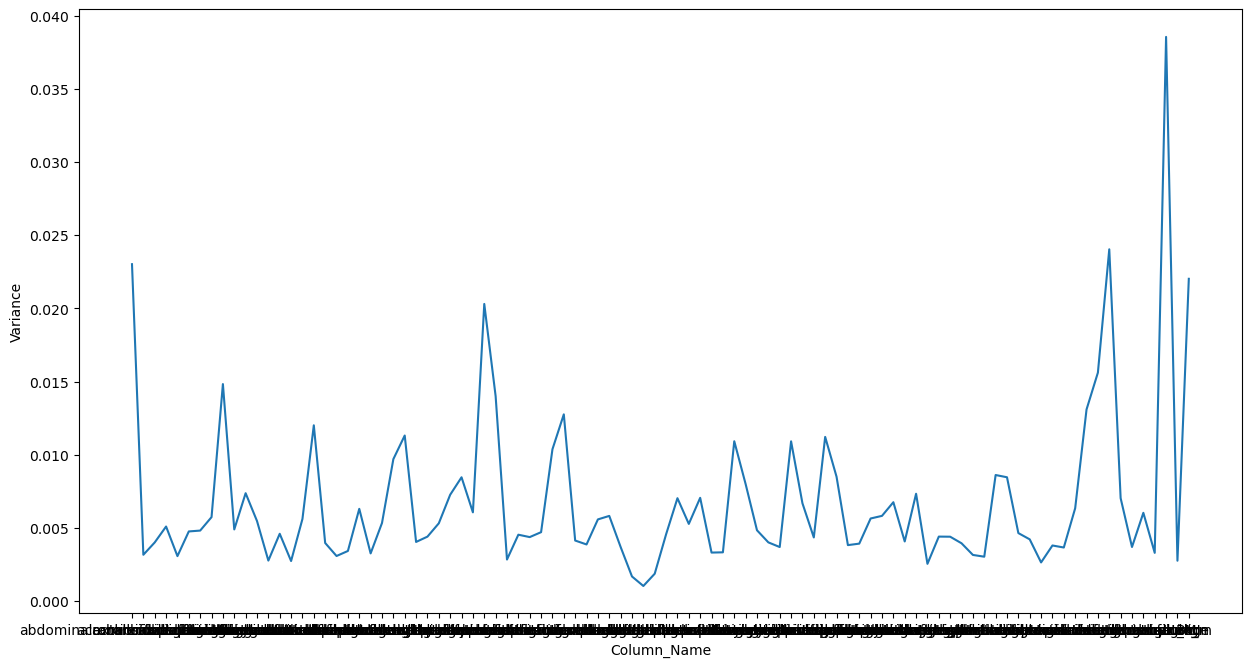

In [20]:
plt.figure(figsize= (15,8), dpi = 100)
plt.plot(normalized_df.columns, normalized_df.var())
plt.xlabel("Column_Name")
plt.ylabel("Variance")


#### Creating and Applying a feature selector

To remove low variances, we can use one of Scikit-learn's built-in feature selection tools called VarianceThreshold(). 

In [21]:
from sklearn.feature_selection import VarianceThreshold

When we create the selector we can set the minimal variance threshold. Here, we've set it to a variance of 0.005.

In [22]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.005)

We divide each column by its mean value before fitting the selector.

In [23]:
# Fit the selector to normalized head_df
sel.fit(X/ X.mean())

VarianceThreshold(threshold=0.005)

After fitting the selector to our dataset, its .get_support() method will give us a True or False value on whether each feature's variance is above the threshold or not. We call this type of boolean array a mask and we can use this mask to reduce the number of dimensions in our dataset.

In [24]:
# Create a boolean mask
mask = sel.get_support()

We use the dataframe's .loc[] method and specify we want to select all rows using a colon for the first argument and sub-select the columns by using our mask as the second. In this case, our selector has reduced the number of features by just one.

In [25]:
# Apply the mask to create a reduced dataframe
reduced_df = X.loc[:, mask]

In [26]:
print("Dimensionality reduced from {} to {}.".format(X.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 94 to 45.


When we apply the selector to our dataset the number of features is more than halved, to 45.

In [27]:
# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(reduced_df, y, test_size=0.3, random_state=101)

In [28]:
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 45 Features.


In [29]:
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

99.3% accuracy on test set vs. 99.5% on training set


we can see that after nearly reducing our features to half, we not only maintain our accuracy but also we increased it a little bit 

#### Missing value selector

Another reason you might want to drop a feature is that it contains a lot of missing values.

In [30]:
school_df = pd.read_csv("Public_Schools2.csv")
school_df.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [31]:
school_df.shape

(131, 21)

#### Missing value selector

These missing values show up in our Pandas dataframe of the Boston Public Schools dataset as NaN and with the .isna() method we can identify them with a boolean value.

#### Counting missing values

Boolean values can be summed since a True value resembles a one and False a zero, so if we chain the .sum() method to .isna() we get the total number of missing values in each column. If we then divide this number by the total number of rows in the dataframe we get a ratio of missing values between zero and one.

In [36]:
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

#### Applying a missing value threshold

Based on this ratio we can create a mask for features that have fewer missing values than a certain threshold. In this case, we set it to 0.5.

In [37]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum()/ len(school_df) < 0.5

Now, we pass our mask to the .loc[] method to sub-select the columns. 

In [38]:
# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

In [39]:
print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


### Pairwise Correlation

Now we'll look at how features relate to one another to decide if they are worth keeping.

#### Correlation coefficient

We need to have a measure for the strength of the correlation, this is where the correlation coefficient r comes in. The value of r always lies between minus one and plus one. Minus one describes a perfectly negative correlation, zero describes no correlation at all and plus one stands for a perfect positive correlation.

When the relation between two features shows more variance, as is usually the case in real-world data, the correlation coefficients will be a bit closer to zero.

In [40]:
ansur_df_ed = pd.read_csv("ansur_df.csv")
ansur_df_ed

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
0,247,175,222,882,877
1,232,167,220,870,851
2,237,180,230,901,854
3,272,176,230,821,769
4,188,188,247,1080,1014
...,...,...,...,...,...
6063,210,162,223,856,779
6064,274,157,202,818,732
6065,204,159,213,846,793
6066,222,146,199,786,763


#### Correlation matrix

We can calculate correlation coefficients on Pandas dataframes with the .corr() method.

In [45]:
corr = ansur_df_ed.corr()
corr

,elbowrestheight,wristcircumference,anklecircumference,buttockheight,crotchheight
elbowrestheight,1.000000,0.294753,0.301963,-0.007013,-0.026090
wristcircumference,0.294753,1.000000,0.702178,0.576679,0.606582
anklecircumference,0.301963,0.702178,1.000000,0.367548,0.386502
buttockheight,-0.007013,0.576679,0.367548,1.000000,0.929411
crotchheight,-0.026090,0.606582,0.386502,0.929411,1.000000


#### Visualizing the correlation matrix

We can visualize this simple correlation matrix using Seaborn's heatmap() function. We've passed a custom color palette and some styling arguments to this function to get a nice looking plot. 

<AxesSubplot:>

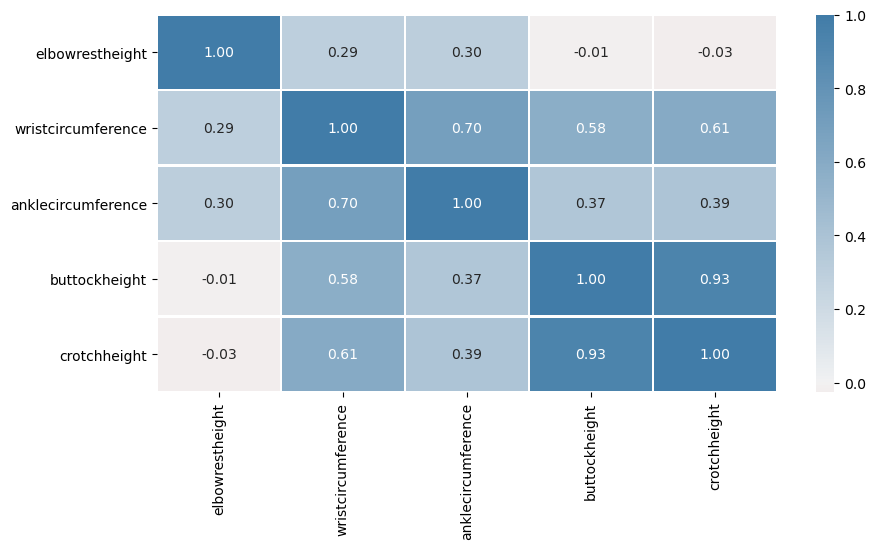

In [46]:
plt.figure(figsize= (10,5), dpi = 100)
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(corr, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

#### Removing duplicates

We can improve this plot further by removing duplicate and unnecessary information like the correlation coefficients of one on the diagonal.

To do so we'll create a boolean mask. We use NumPy's ones_like() function to create a matrix filled with True values with the same dimensions as our correlation matrix and then pass this to NumPy's triu(), for triangle upper, function to set all non-upper triangle values to False.

In [47]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

When we pass this mask to the heatmap() function it will ignore the upper triangle, allowing us to focus on the interesting part of the plot.

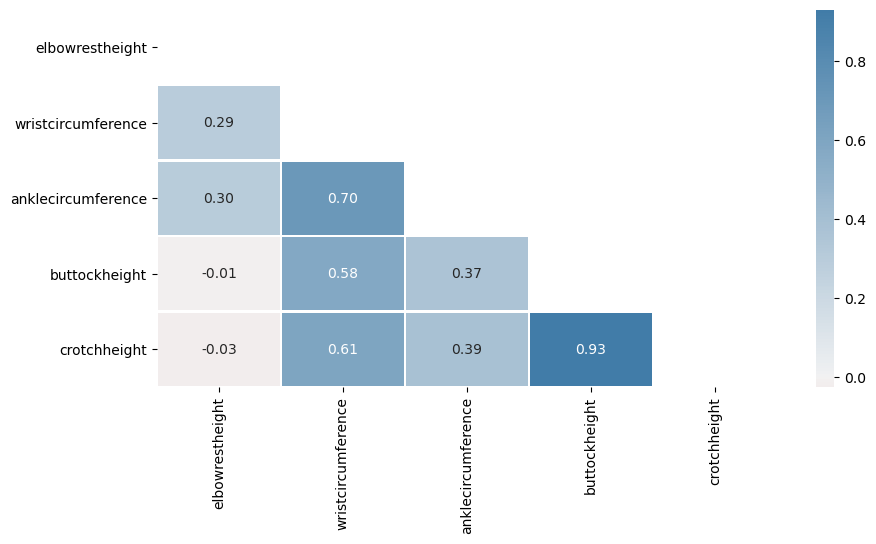

In [48]:
# Add the mask to the heatmap
plt.figure(figsize= (10,5), dpi = 100)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### Removing highly correlated features

Features that are perfectly correlated to each other, with a correlation coefficient of one or minus one, bring no new information to a dataset but do add to the complexity. So naturally, we would want to drop one of the two features that hold the same information. 

In addition to this we might want to drop features that have correlation coefficients close to one or minus one if they are measurements of the same or similar things.

In this ANSUR Male dataset We get correlation coefficients as high as 98%. So for these features it too makes sense to keep only one. Not just for simplicity's sake but also to avoid models to overfit on the small, probably meaningless, differences between these values. 

If you are confident that dropping highly correlated features will not cause you to lose too much information, you can filter them out using a threshold value.

In [50]:
ansur_male = pd.read_csv("ANSUR_II_MALE.csv")
ansur_male.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


First create a correlation matrix and take the absolute values of that, to also filter out strong negative correlations. 

In [51]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()
corr_matrix

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,...,0.859924,0.939899,0.958932,0.579296,0.162457,0.550544,0.389220,0.825714,0.316876,0.866356
acromialheight,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,...,0.446707,0.413142,0.371948,0.604967,0.933248,0.734622,0.922687,0.684610,0.980269,0.227299
acromionradialelength,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,...,0.384245,0.364133,0.338024,0.481149,0.851464,0.646149,0.684979,0.603964,0.859657,0.206267
anklecircumference,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,0.453308,...,0.589723,0.569306,0.517324,0.479788,0.420109,0.702178,0.514394,0.745950,0.517026,0.625492
axillaheight,0.290821,0.987452,0.862074,0.469964,1.000000,0.657168,0.790214,0.707868,0.465773,0.369885,...,0.372178,0.337927,0.301106,0.565922,0.948190,0.687252,0.905063,0.621812,0.975837,0.147598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.581908,0.579536,0.557457,0.614334,0.637957,1.000000,0.663991,0.801215,0.749818,0.544034
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.484488,0.446004,0.396134,0.615569,0.817358,0.663991,1.000000,0.671151,0.892968,0.267193
weight_kg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.859654,0.872724,0.832213,0.677454,0.532079,0.801215,0.671151,1.000000,0.660265,0.854700
stature_m,0.316876,0.980269,0.859657,0.517026,0.975837,0.709889,0.815345,0.772618,0.520296,0.375509,...,0.408182,0.368734,0.327334,0.611199,0.936726,0.749818,0.892968,0.660265,1.000000,0.183094


Then create a mask for the upper triangle of the dataset just like we did when we were visualizing the correlation matrix.

In [52]:
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype= bool))

In [58]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

When we pass this mask to the Pandas dataframe .mask() method it will replace all positions in the dataframe where the mask has a True value with NA. So that our correlation matrix dataframe looks like this.

In [53]:
tri_df = corr_matrix.mask(mask)
tri_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromialheight,0.360623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromionradialelength,0.321755,0.872475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anklecircumference,0.524747,0.512417,0.424626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillaheight,0.290821,0.987452,0.862074,0.469964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.581908,0.579536,0.557457,0.614334,0.637957,NaN,NaN,NaN,NaN,NaN
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.484488,0.446004,0.396134,0.615569,0.817358,0.663991,NaN,NaN,NaN,NaN
weight_kg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.859654,0.872724,0.832213,0.677454,0.532079,0.801215,0.671151,NaN,NaN,NaN
stature_m,0.316876,0.980269,0.859657,0.517026,0.975837,0.709889,0.815345,0.772618,0.520296,0.375509,...,0.408182,0.368734,0.327334,0.611199,0.936726,0.749818,0.892968,0.660265,NaN,NaN


We can then use a list comprehension to find all columns that have a correlation to any feature stronger than the threshold value. The reason we used the mask to set half of the matrix to NA values is that we want to avoid removing both features when they have a strong correlation.

In [55]:
# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]
len(to_drop)

19

Finally we drop the selected features from the dataframe with the .drop() method.

In [56]:
# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 76 columns.


#### Correlation caveats 

The method we just discussed is a bit of a brute force approach that should only be applied if you have a good understanding of the dataset. If you're unsure whether removing highly correlated features will remove important information from the data but still need to reduce dimensionality, you could consider feature extraction techniques. 

What's important to know about correlation coefficients is that they can produce weird results when the relation between two features is non-linear or when outliers are involved. To avoid unpleasant surprises like this, make sure you visually check your data early on.

A final thing to know about strong correlations is that they do not imply causation. 